In [6]:
import os
new_dir = "C:/Users/Andy/Documents/stock/"
os.chdir(new_dir)

In [15]:
# Define your database path
db_path = "C:/Users/Andy/Documents/stock/model_parameter_result/optuna_results.db"
storage_url = f"sqlite:///{db_path}"

# List all studies in the database
study_summaries = optuna.study.get_all_study_summaries(storage=storage_url)

if study_summaries:
    print("✅ Found the following studies in the database:")
    for study_summary in study_summaries:
        print(f"- Study Name: {study_summary.study_name}")
else:
    print("❌ No studies found in the database!")

[W 2025-03-19 19:28:53,154] Caught an error from sqlalchemy: (sqlite3.OperationalError) too many SQL variables
[SQL: SELECT trials.trial_id AS trials_trial_id, trials.number AS trials_number, trials.study_id AS trials_study_id, trials.state AS trials_state, trials.datetime_start AS trials_datetime_start, trials.datetime_complete AS trials_datetime_complete 
FROM trials 
WHERE trials.trial_id IN (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?

✅ Found the following studies in the database:
- Study Name: lgbm_f1_optimization
- Study Name: no-name-b5145635-6fa1-4694-b4f3-4c26a196395a


In [35]:
import optuna

db_path = "model_parameter_result/optuna_results.db"  # Update with actual path
study = optuna.load_study(study_name="gbdt_tuning", storage=f"sqlite:///{db_path}")

# Fetch trials in batches
trials = study.get_trials(deepcopy=False)

# Extract F1 scores from trials
f1_scores = [trial.value for trial in trials]

print(f"Loaded {len(f1_scores)} trials successfully!")


KeyError: 'Record does not exist.'

In [17]:
print("🔹 Best F1 Score:", study.best_value)
print("🔹 Best Hyperparameters:", study.best_params)

🔹 Best F1 Score: 0.6935866983372921
🔹 Best Hyperparameters: {'boosting_type': 'dart', 'num_leaves': 10, 'learning_rate': 0.004889109596845264, 'n_estimators': 16943, 'max_bin': 232, 'subsample': 0.7823086040575833, 'subsample_freq': 13, 'colsample_bytree': 0.8106243879716812, 'min_child_samples': 5}


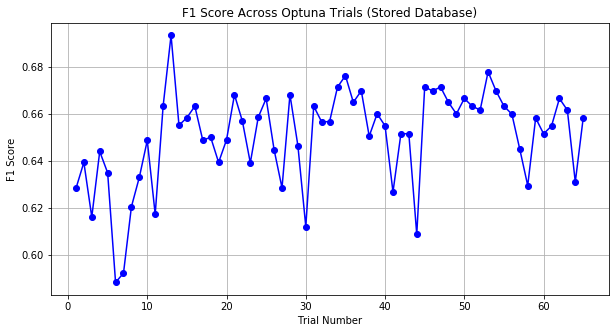

In [18]:
import matplotlib.pyplot as plt

# Extract F1 scores from trials
f1_scores = [trial.value for trial in study.trials]

# Plot the F1 scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel("Trial Number")
plt.ylabel("F1 Score")
plt.title("F1 Score Across Optuna Trials (Stored Database)")
plt.grid(True)

# Show plot
plt.show()

In [20]:
import os
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pypinyin import lazy_pinyin

# Step 1: Change the working directory (update the path accordingly)
new_dir = "C:/Users/Andy/Documents/stock/"
os.chdir(new_dir)

C:\Users\Andy\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [21]:
df = pd.read_csv("Trim_train/merged_cleaned_data.csv")

In [22]:
from pypinyin import lazy_pinyin
df.columns = [lazy_pinyin(col)[0] for col in df.columns]

In [24]:
target_column = "biao" 

In [25]:
X = df.drop(columns=[target_column, "ID"], errors="ignore")
y = df[target_column]

In [27]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
arguments = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "num_leaves": 20,
    "learning_rate": 0.01034,
    "n_estimators": 30000,
    "max_bin": 113,
    "subsample": 0.7708753433144212,
    "subsample_freq": 5,
    "colsample_bytree": 0.6628,
    "feature_fraction_seed": 42,
    "bagging_seed": 42,
    "min_child_samples": 25
}

In [38]:
# Split dataset before running Optuna (Ensuring same train-test split)
X_train_opt, X_val, y_train_opt, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the Optuna objective function for hyperparameter tuning
def objective(trial):
    params = {
        "objective": "regression",
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 10, 50),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.1),
        "n_estimators": trial.suggest_int("n_estimators", 10000, 30000),
        "max_bin": trial.suggest_int("max_bin", 50, 200),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "feature_fraction_seed": 42,
        "bagging_seed": 42,
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50)
    }

    X_train_opt, X_val, y_train_opt, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train model
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train_opt, y_train_opt, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)

    # Predict & Evaluate
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_pred_proba >= 0.3).astype(int)  # Adjust threshold if needed
    f1 = f1_score(y_val, y_pred)
    
    return f1

In [37]:
study = optuna.create_study(direction="maximize", study_name="gbdt_tuning0319",storage=storage_url)

[I 2025-03-19 23:24:31,711] A new study created in RDB with name: gbdt_tuning0319


In [32]:
from sklearn.metrics import f1_score

In [39]:
study.optimize(objective, n_trials=25)  # Run 30 trials

# Show best parameters
print("Best Hyperparameters:", study.best_params)

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-19 23:27:17,256] Trial 0 finished with value: 0.5465465465465467 and parameters: {'num_leaves

[I 2025-03-19 23:34:43,440] Trial 6 finished with value: 0.5510835913312693 and parameters: {'num_leaves': 12, 'learning_rate': 0.0020459176153180265, 'n_estimators': 28234, 'max_bin': 165, 'subsample': 0.8560788321629288, 'subsample_freq': 9, 'colsample_bytree': 0.5068452716856221, 'min_child_samples': 28}. Best is trial 3 with value: 0.6481994459833795.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-19 23:38:47,022] Trial 13 finished with value: 0.6460674157303371 and parameters: {'num_leaves': 22, 'learning_rate': 0.08721042251204623, 'n_estimators': 15654, 'max_bin': 86, 'subsample': 0.9915461162269353, 'subsample_freq': 1, 'colsample_bytree': 0.6634768737097518, 'min_child_samples': 41}. Best is trial 11 with value: 0.659400544959128.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anacond

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-19 23:50:04,143] Trial 20 finished with value: 0.6334310850439883 and parameters: {'num_leaves': 17, 'learning_rate': 0.004939485474766766, 'n_estimators': 17891, 'max_bin': 105, 'subsample': 0.8597130546939742, 'subsample_freq': 1, 'colsample_bytree': 0.5912869068352784, 'min_child_samples': 18}. Best is trial 11 with value: 0.659400544959128.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: Futur

Best Hyperparameters: {'num_leaves': 43, 'learning_rate': 0.03992385721621942, 'n_estimators': 14144, 'max_bin': 82, 'subsample': 0.9181303473756289, 'subsample_freq': 7, 'colsample_bytree': 0.6538652124575284, 'min_child_samples': 40}


In [44]:
arguments = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "num_leaves": 20,
    "learning_rate": 0.01034,
    "n_estimators": 3000,
    "max_bin": 113,
    "subsample": 0.7708753433144212,
    "subsample_freq": 5,
    "colsample_bytree": 0.6628,
    "feature_fraction_seed": 42,
    "bagging_seed": 42,
    "min_child_samples": 25
}

In [45]:
bigModel = lgb.LGBMClassifier(**arguments)
bigModel.fit(X_train, y_train)

# Step 6: Predict and Evaluate Accuracy
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability for class 1

In [46]:
X_train.columns = X_train.columns.astype(str)
X_test.columns =X_test.columns.astype(str)

# Rename duplicate columns by adding a suffix (_1, _2, etc.)
X_train.columns = pd.Series(X_train.columns).astype(str) + "_" + pd.Series(X_train.columns).groupby(X_train.columns).cumcount().astype(str)
X_test.columns = pd.Series(X_test.columns).astype(str) + "_" + pd.Series(X_test.columns).groupby(X_test.columns).cumcount().astype(str)


In [48]:
feature_importance = pd.DataFrame({"feature": X_train.columns, "importance": bigModel.feature_importances_})
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# Keep only top 200 most important features
top_features = feature_importance.head(30)["feature"].tolist()

In [49]:
X_train_trimmed = X_train[top_features]
X_test_trimmed = X_test[top_features]

In [54]:
X_train_trimmed = X_train_trimmed.fillna(X_train_trimmed.mean())
X_test_trimmed = X_test_trimmed.fillna(X_test_trimmed.mean())

In [61]:
study = optuna.create_study(direction="maximize", study_name="gbdt_tuning0322_bestfeatures",storage=storage_url)

[I 2025-03-21 13:01:27,408] A new study created in RDB with name: gbdt_tuning0322_bestfeatures


In [66]:
# Split dataset before running Optuna (Ensuring same train-test split)
X_train_opt, X_val, y_train_opt, y_val = train_test_split(X_train_trimmed, y_train, test_size=0.2, random_state=42)

# Define the Optuna objective function for hyperparameter tuning
def objective(trial):
    params = {
        "objective": "binary",
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 10, 50),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.001, 0.01),
        "n_estimators": trial.suggest_int("n_estimators", 30000, 60000),
        "max_bin": trial.suggest_int("max_bin", 50, 200),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 1, 10),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "feature_fraction_seed": 42,
        "bagging_seed": 42,
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50)
    }

    X_train_opt, X_val, y_train_opt, y_val = train_test_split(X_train_trimmed, y_train, test_size=0.2, random_state=42)

    # Train model
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train_opt, y_train_opt, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)

    # Predict & Evaluate
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_pred_proba >= 0.3).astype(int)  # Adjust threshold if needed
    f1 = f1_score(y_val, y_pred)
    
    return f1

In [67]:
study.optimize(objective, n_trials=10)  # Run 30 trials

# Show best parameters
print("Best Hyperparameters:", study.best_params)

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-21 15:08:38,056] Trial 18 finished with value: 0.6352941176470588 and parameters: {'num_leave

[I 2025-03-21 15:11:02,223] Trial 24 finished with value: 0.6208955223880598 and parameters: {'num_leaves': 42, 'learning_rate': 0.001131726009715065, 'n_estimators': 30037, 'max_bin': 116, 'subsample': 0.8139541425535903, 'subsample_freq': 7, 'colsample_bytree': 0.9967655401785513, 'min_child_samples': 28}. Best is trial 22 with value: 0.6371681415929203.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages

Best Hyperparameters: {'num_leaves': 38, 'learning_rate': 0.00248740115632934, 'n_estimators': 34005, 'max_bin': 70, 'subsample': 0.8760382373050404, 'subsample_freq': 5, 'colsample_bytree': 0.859379336321654, 'min_child_samples': 44}
